Lab 5 will focus on `Ensembles`. We will apply these methods to a dataset of social media add profiles with limited information: sex, age, and a user-reported salary. We will use these methods to predict whether a user is likely to purchase a product after clicking on an advertisement shown to them.

The data file `Social_Network_Ads.csv` contains 5 columns:
- **UserID**- Each person has a unique ID..
- **Sex**- Male or female. 
- **Age**- Age of the person.
- **EstimatedSalary**- User reported salary.
- **Purchased**- ‘0’ if the user did not purchase the product and ‘1’ if they did. This is our target!

In [1]:
#Suppress all warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.svm import SVC

In [3]:
# Load the dataset
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Sex,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#Info and description
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Sex              400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
#Convert male/female to 0/1
data.Sex = data.Sex.replace({'Male':0,'Female':1})

# Split the data into target and features
X = data.drop(['User ID','Purchased'],axis=1)
y = data.Purchased

In [6]:
# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 21)

In [7]:
# Feature Scaling
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Ensembles

In this section, we will five different models and combine them into a custom ensemble.

In [8]:
#Logistic Regression

LogReg = LogisticRegression(C=1, penalty='l1', solver='liblinear', max_iter=100000, random_state = 21)
LogReg.fit(X_train, y_train)
y_predLogReg = LogReg.predict_proba(X_test).T[1]
LogReg_score= roc_auc_score(y_test,y_predLogReg)

print('\n AUC of Logistic Regression on test data: {}'.format(round(LogReg_score,3)))


 AUC of Logistic Regression on test data: 0.939


In [9]:
#CART

cart = DecisionTreeClassifier(max_depth=5, random_state=14)
cart.fit(X_train, y_train)
y_predCart = cart.predict_proba(X_test).T[1]
cart_score= roc_auc_score(y_test,y_predCart)  

print('AUC of CART on test data is {}'.format(round(cart_score,3)))

AUC of CART on test data is 0.937


In [10]:
#Random Forest

rf = RandomForestClassifier(max_depth = 5, n_estimators = 100, max_features = 0.1,random_state = 21)
rf.fit(X_train, y_train)
y_predRf = rf.predict_proba(X_test).T[1]
rf_score= roc_auc_score(y_test,y_predRf) 

print('AUC of Random Forest on test data is {}'.format(round(rf_score, 3)))

AUC of Random Forest on test data is 0.959


`AdaBoost` is a popular type of boosting algorithm. The most important parameters are `base_estimator`, `n_estimators`, and `learning_rate`. Different base learners can be used such as CART and SVMs. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) for more information

In [11]:
#AdaBoost Classifier

abc = AdaBoostClassifier(n_estimators=100,learning_rate=1)
abc.fit(X_train, y_train)
y_predAbc = abc.predict_proba(X_test).T[1]
abc_score = roc_auc_score(y_test,y_predAbc)

print('AUC of AdaBoosting Classifier on test data is {}'.format(round(abc_score, 3)))

AUC of AdaBoosting Classifier on test data is 0.967


`Gradient boosting` is another popular type of boosting alogorithm. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) for more information. 

In [12]:
#Gradient Boosting Classifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1, random_state=0)
gbc.fit(X_train, y_train)
y_predGbc = gbc.predict_proba(X_test).T[1]
gbc_score = roc_auc_score(y_test,y_predGbc)   

print('AUC of Gradient Boosting Classifier on test data is {}'.format(round(gbc_score, 3)))

AUC of Gradient Boosting Classifier on test data is 0.969


> Manually change the hyperparameters in the above models and see if you can find better combinations!

Now we will create our own ensemble model by combining all five of the above models. We will create two versions: one where each model is weighted equally and another where each model is weighted by performance. To do this, we use `EnsembleVoteClassifier`. See [here](http://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/) for more information.

There is also a custom ensemble tool in sklearn, named as `VotingClassifier`. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) for more information. 

In [13]:
#Custom ensemble with equal weights

eclf1 = EnsembleVoteClassifier(clfs=[LogReg, cart, rf, abc, gbc], weights=[1,1,1,1,1],voting='soft')
eclf1.fit(X_train,y_train)
y_predEns1 = eclf1.predict_proba(X_test).T[1]
Ens_score1 = roc_auc_score(y_test,y_predEns1)   

print('AUC of our custom ensemble on test data is {}'.format(round(Ens_score1, 3)))

AUC of our custom ensemble on test data is 0.97


In [14]:
#Custom ensemble with accuracy-based weights

eclf2 = EnsembleVoteClassifier(clfs=[LogReg, cart, rf, abc, gbc], weights=[LogReg_score,cart_score,rf_score,abc_score,gbc_score],voting='soft')
eclf2.fit(X_train,y_train)
y_predEns2 = eclf2.predict_proba(X_test).T[1]
Ens_score2 = roc_auc_score(y_test,y_predEns2)   

print('AUC of our custom ensemble on test data is {}'.format(round(Ens_score2, 3)))

AUC of our custom ensemble on test data is 0.97


In [15]:
#Custom ensemble with custom weights

#Pick your own custom weights!
weights = [1,1,1,1,1]

eclf2 = EnsembleVoteClassifier(clfs=[LogReg, cart, rf, abc, gbc], weights=weights,voting='soft')
eclf2.fit(X_train,y_train)
y_predEns2 = eclf2.predict_proba(X_test).T[1]
Ens_score2 = roc_auc_score(y_test,y_predEns2)   

print('AUC of our custom ensemble on test data is {}'.format(round(Ens_score2, 3)))

AUC of our custom ensemble on test data is 0.97


Let's visualize the `ROC curves` of the different models

NameError: name 'fprSvc' is not defined

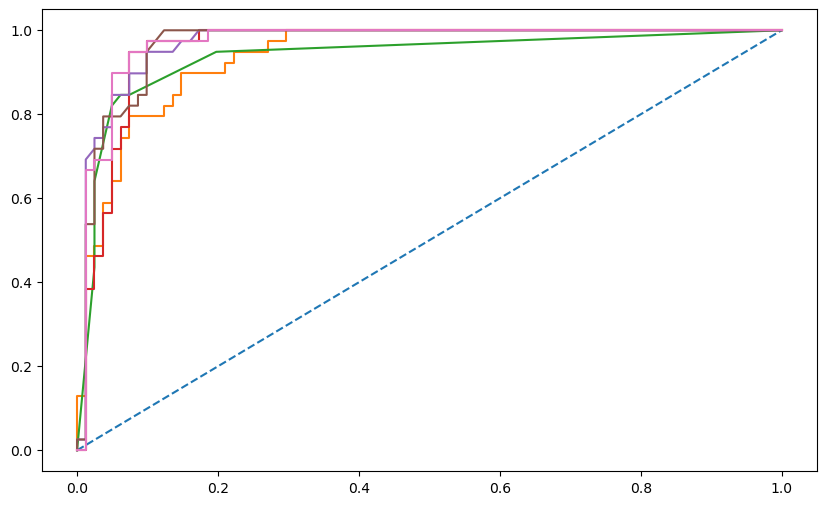

In [16]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc

#for Logistic Regression
LogRegPred = LogReg.predict_proba(X_test).T[1]
fprLogReg, tprLogReg, threshLogReg = roc_curve(y_test, LogRegPred)
roc_auc_LogReg= roc_auc_score(y_test, LogRegPred)

#for CART
cartPred = cart.predict_proba(X_test).T[1]
fprCart, tprCart, threshCart = roc_curve(y_test, cartPred)
roc_auc_cart= roc_auc_score(y_test, cartPred)

#for Random Forest
rfPred = rf.predict_proba(X_test).T[1]
fprRf, tprRf, threshRf = roc_curve(y_test, rfPred)
roc_auc_rf= roc_auc_score(y_test, rfPred)

#for GBC
gbcPred = gbc.predict_proba(X_test).T[1]
fprGbc, tprGbc, threshGbc = roc_curve(y_test, gbcPred)
roc_auc_gbc= roc_auc_score(y_test, gbcPred)

#for AdaBoosting
abcPred = abc.predict_proba(X_test).T[1]
fprAbc, tprAbc, threshAbc = roc_curve(y_test, abcPred)
roc_auc_abc= roc_auc_score(y_test, abcPred)

#for Ensemble 
ensemblePred = eclf2.fit(X_train,y_train).predict_proba(X_test)
fprEnsemble, tprEnsemble, threshEnsemble = roc_curve(y_test, ensemblePred[:, 1])
roc_auc_ensemble = auc(fprEnsemble, tprEnsemble)



# Plotting ROC curve

fig = plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fprLogReg, tprLogReg, label='Logistic Regression (AUC = %0.2f)' % roc_auc_LogReg)
plt.plot(fprCart, tprCart, label='CART (AUC = %0.2f)' % roc_auc_cart)
plt.plot(fprRf, tprRf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fprGbc, tprGbc, label='GradientBoosting (AUC = %0.2f)' % roc_auc_gbc)
plt.plot(fprAbc, tprAbc, label='AdaBoosting (AUC = %0.2f)' % roc_auc_abc)
plt.plot(fprEnsemble, tprEnsemble, label='Ensemble (AUC = %0.2f)' % roc_auc_ensemble)
plt.plot(fprSvc, tprSvc, label='SVC (AUC = %0.2f)' % roc_auc_svc)  

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Comparison of Different Models ', fontsize = 15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');
plt.show()

#fig.savefig('ROCcomparison.pdf', bbox_inches='tight')


## Comparing all the models 

This last code block provides a framework to train, test, and compare many different models at the same time.

In [ ]:
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=1, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [ ]:
#Choose the models and hyperparameter values for grid search

#You can add or remove models here
models = {
    'LogisticRegression' : LogisticRegression(), 
    'CART' : DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
}


#####
#PICK YOUR OWN HYPERPARAMETER VALUES!
#####
params = {
    'LogisticRegression' : { 'C': [1, 100], 'penalty': ['l1', 'l2']},
    'CART' : { 'max_depth' : [3, 5, 10] },
    'RandomForestClassifier': { 'n_estimators': [10, 50], 'min_samples_leaf' : [10, 50] },
    'AdaBoostClassifier':  { 'n_estimators': [10, 50] },
    'GradientBoostingClassifier': { 'n_estimators': [10, 50], 'learning_rate': [0.8, 1.0]}

In [ ]:
#Run the model - note that this may take a while!

#Define the models and parameters
helper = EstimatorSelectionHelper(models, params)

#Fit the models
helper.fit(X_train, y_train, scoring='roc_auc')

#Print the output and rank by mean AUC
helper.score_summary(sort_by='mean_score')